In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pkl
from collections import OrderedDict
import data_iterator
import nmt


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)


In [50]:
#deen norepeat ln
source_dic = "/data/lisatmp4/gulcehrc/nmt/data/wmt15/deen/train/all_de-en.en.tok.bpe.word.pkl"
target_dic = "/data/lisatmp4/gulcehrc/nmt/data/wmt15/deen/train/all_de-en.de.tok.300.pkl"
data_path_source = "/data/lisatmp4/gulcehrc/nmt/data/wmt15/deen/dev/newstest2013.en.tok.bpe"
data_path_target = "/data/lisatmp4/gulcehrc/nmt/data/wmt15/deen/dev/newstest2013.de.tok.bpe"
model_path = "/data/lisatmp4/dutilfra/attentive_model/nips_deen_norepeat_pen_step2/bpe2char_gru_planning_adam_last_520000_best_npz_merged.last.npz"
option_path = "/data/lisatmp4/dutilfra/attentive_model/nips_deen_norepeat_pen_step2/bpe2char_gru_planning_adam_last_520000_best_npz_merged.last.pkl"
import char_planning
reload(char_planning)
module = char_planning
fig_path_pre = 'NIPS_final/deen_norepeat'

In [131]:
print "Loading the options ..."
import visualisation_utils
reload(visualisation_utils)
options = visualisation_utils.load_options(pkl_file=option_path)
#options['decoder_type'] = 'planning'
print "Loading the data..."
dic_source, dic_target = visualisation_utils.load_dicts(source_dic, target_dic)
data_source = visualisation_utils.load_data(data_path_source, dic_source, options, 128)
data_target = visualisation_utils.load_data(data_path_target, dic_target, options, 128)

Loading the options ...
Loading the data...


In [133]:
#Loadting the model
import mixer
reload(mixer)
print "loading, ", model_path
tparams, f_init, f_next = visualisation_utils.load_model(model_path, options, module, sampler=True) 

loading,  /data/lisatmp4/dutilfra/model_files/nmt/de-en_baseline_w/baseline.last.npz
source dictionary size: 24440
target dictionary size: 302
Building f_init... Done
Building f_next... Done


In [134]:
matplotlib.rcParams.update({'font.size': 15, 'font.weight':'bold'})
def show_alpha(alphas, xs, ys, i, size=(50, 30), commits=None, no_name=0, fig_path=None, font_size=30):
    #fig, ax1 = plt.subplots(1,1)
    #plt.set_cmap(cmap)
    
    def show_graph(data):
        
        labels_source = visualisation_utils.convert([list(x) for x in xs.T], dic_source, char_lvl=False)
        labels_source = [x.decode("utf-8").replace('@@', '') for x in labels_source]
        
        print len(data)
        labels_target = visualisation_utils.convert([list(y) for y in ys.T], dic_target, char_lvl=True)
        labels_target = [y.decode("utf-8") for y in labels_target]#.replace('@@', '')
        
        plt.figure(figsize=size)
        print i
        print "Our number of t:", len(labels_target)
        plt.imshow(data[:, :len(labels_target)], cmap='gray')
        #cb = ax1.colorbar()

        print len(labels_target[i])
        print alphas.shape[1]
        plt.yticks(range(alphas.shape[0]), labels_source[i].split())#
        
        try:
            print "source: {}, target: {}".format(labels_source[i], "".join(labels_target))
        except:
            print "can't print, sorry!"
            
        labels_target = visualisation_utils.convert([list(y) for y in ys.T], dic_target, char_lvl=True)
        labels_target = [x.decode("utf-8") for x in labels_target]#.replace('@@', '')
        plt.xticks(range(alphas.shape[1]), labels_target)#, rotation='vertical')    
        
        # the font size
        for tick in plt.gca().xaxis.get_major_ticks():
            tick.label.set_fontsize(font_size) 
        for tick in plt.gca().yaxis.get_major_ticks():
            tick.label.set_fontsize(font_size) 

        
        if fig_path:
            print "saving in {}".format(fig_path.format(no_name))
            plt.savefig(fig_path.format(no_name), bbox_inches='tight')
        plt.show()
        
    show_graph(alphas)
    if commits is not None:
        
        print commits.shape
        commit_show = np.concatenate((np.array([1.]), commits[:-1]))
        #commit_show= commits
        show_graph(alphas + commit_show)



NIPS_final/deen_base_noln_len5/fig_{}.pdf
21
sample no 0
P@@ rev@@ enting the disease
Die Aussprache ist .
20
Our shape: (21, 6)
nb of word:  5
()
6
0
Our number of t: 21
1
21
source: P rev enting the disease, target: Die Aussprache ist .
saving in NIPS_final/deen_base_noln_len5/fig_860.pdf


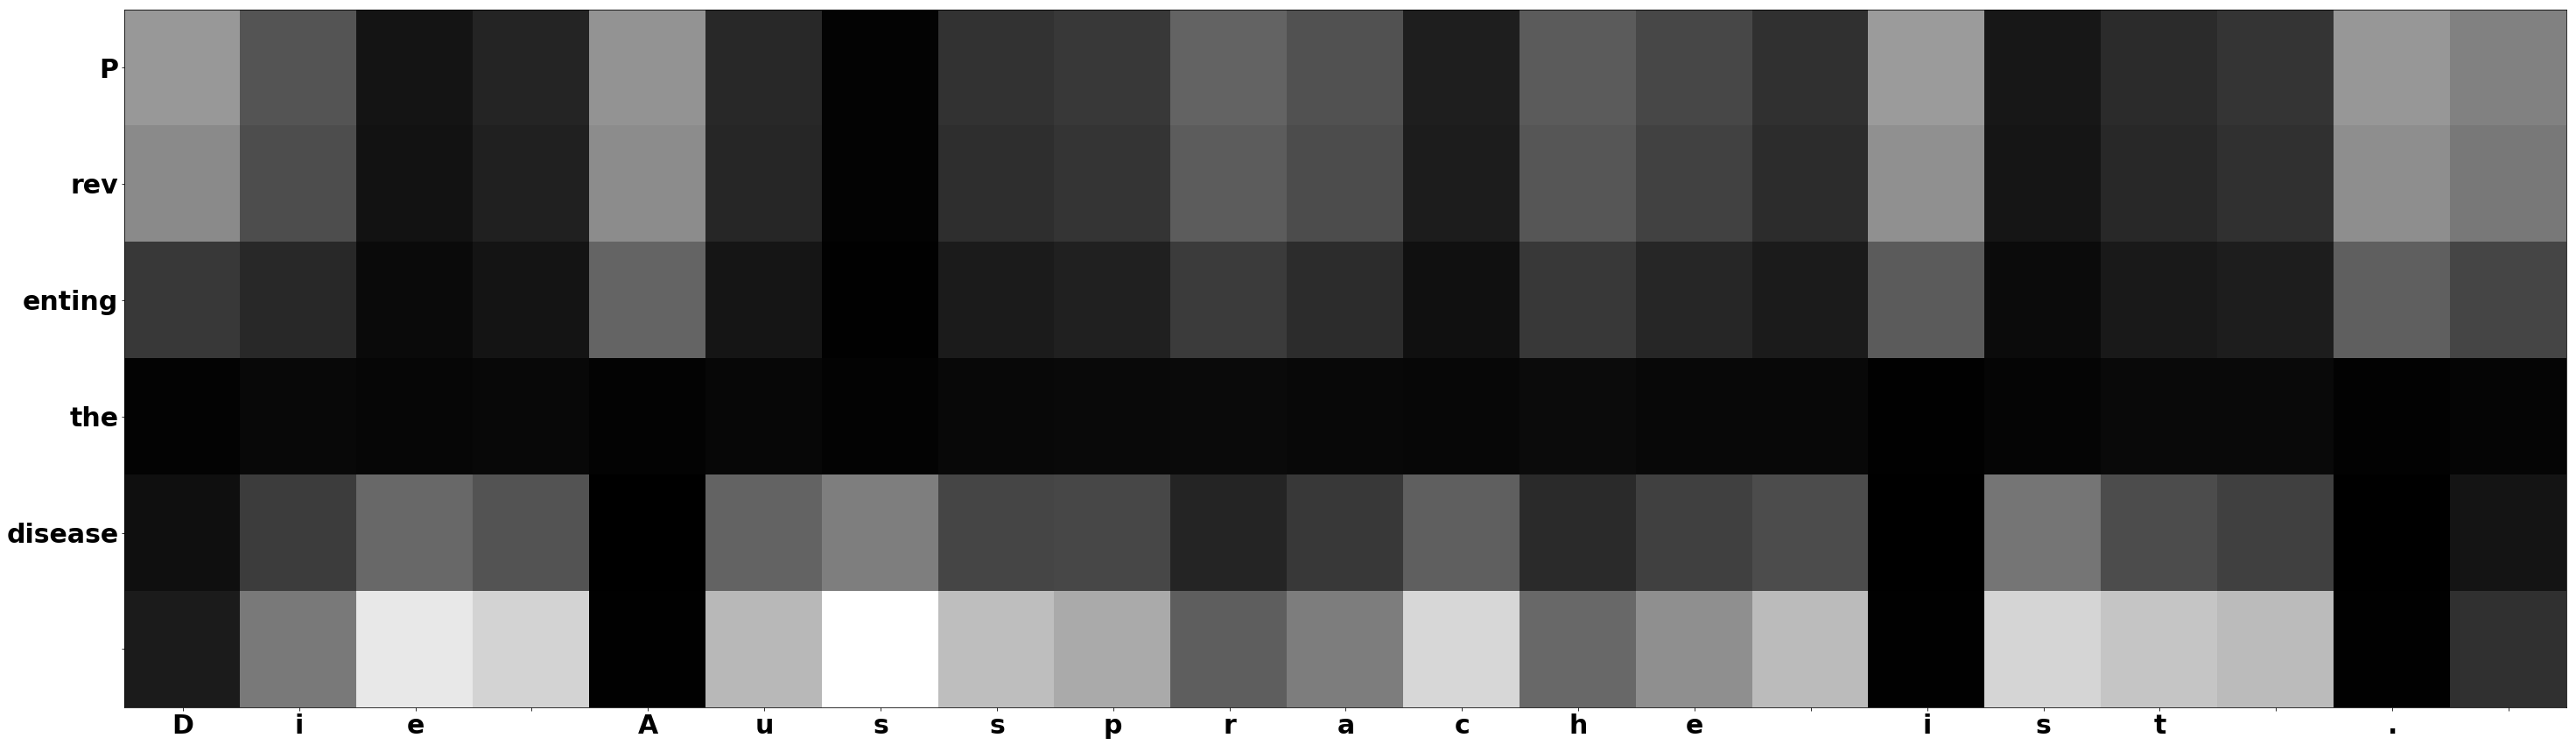

that was for: 860
nb:  1
14
sample no 0
No all-@@ powerful care
Das ist ein .
13
Our shape: (14, 5)
nb of word:  4
()
5
0
Our number of t: 14
1
14
source: No all- powerful care, target: Das ist ein .
saving in NIPS_final/deen_base_noln_len5/fig_2260.pdf


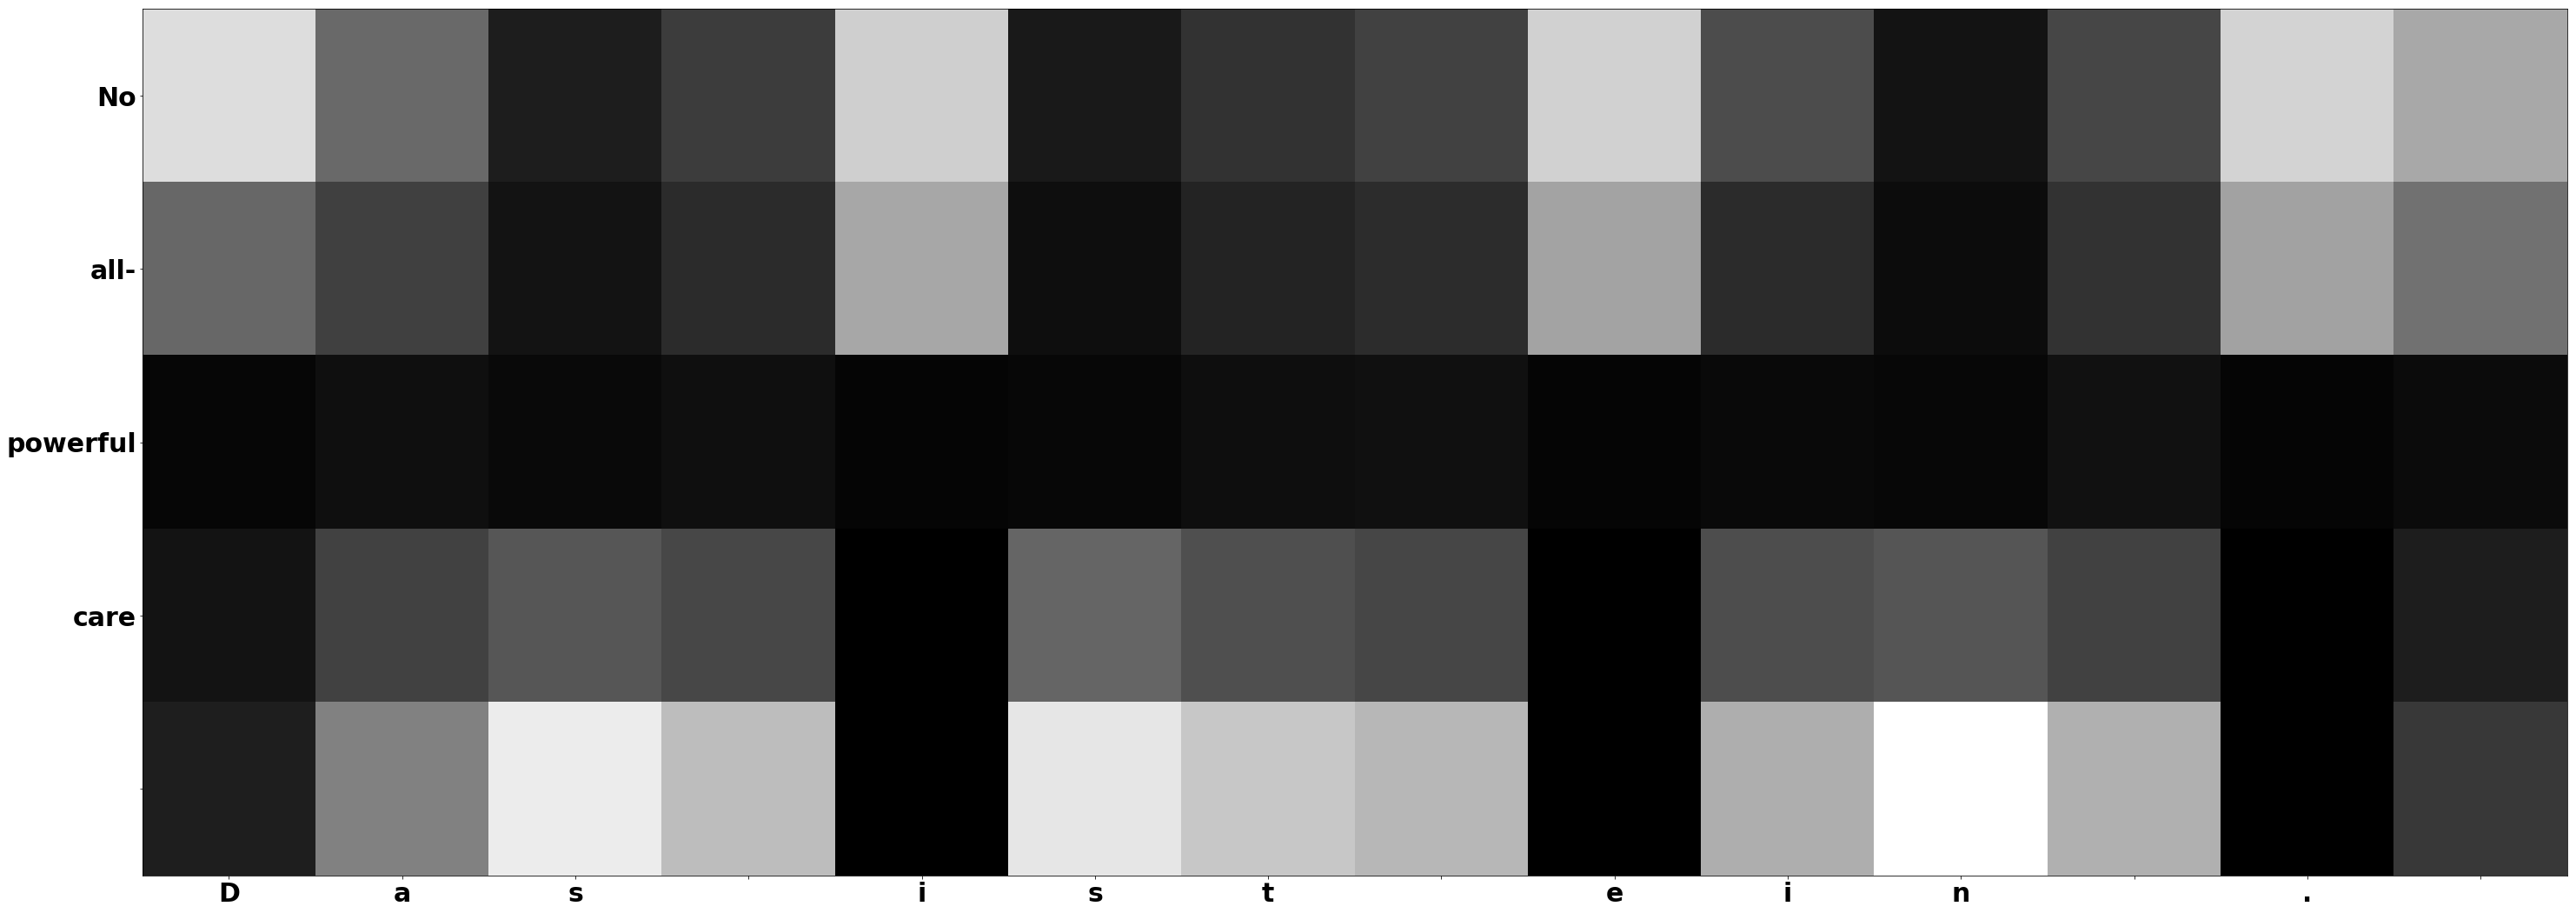

that was for: 2260
nb:  2
21
sample no 0
How to clean house .
Die Aussprache ist .
20
Our shape: (21, 6)
nb of word:  5
()
6
0
Our number of t: 21
1
21
source: How to clean house ., target: Die Aussprache ist .
saving in NIPS_final/deen_base_noln_len5/fig_2650.pdf


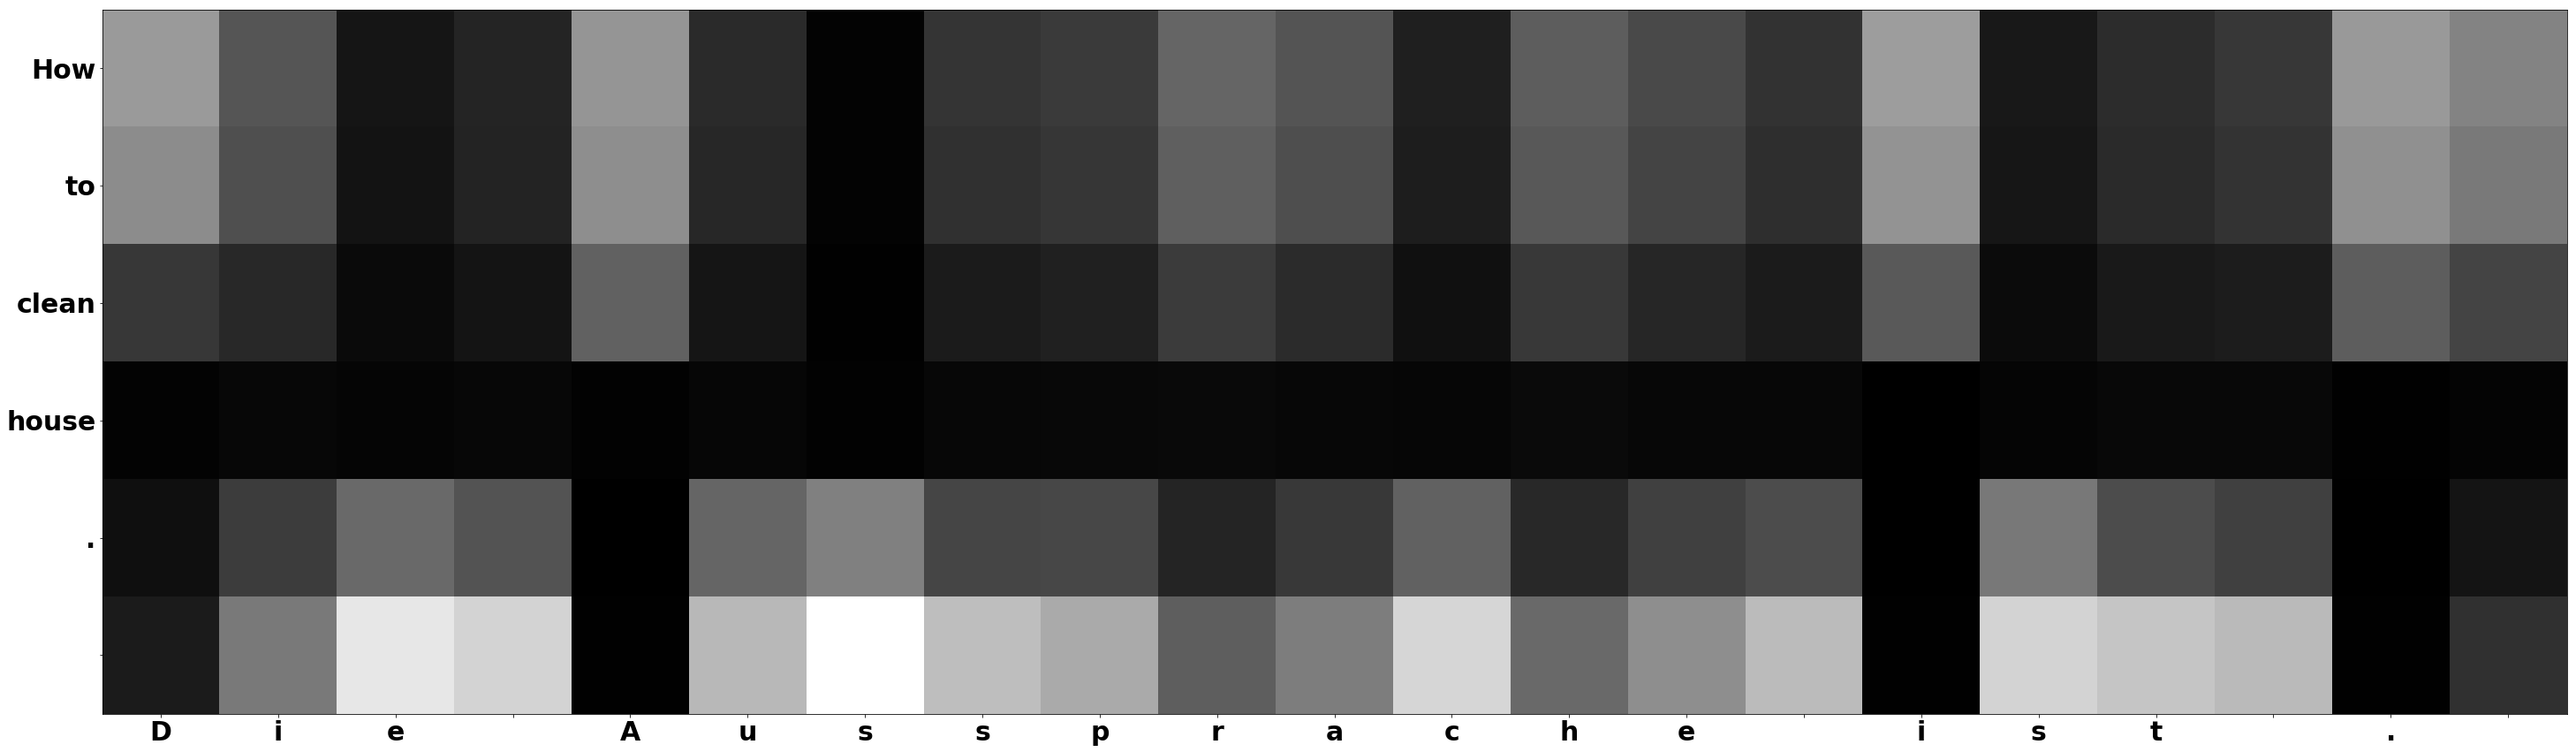

that was for: 2650
nb:  3
26
sample no 0
De@@ fin@@ itely .
Das ist eine Aussprache .
25
Our shape: (26, 5)
nb of word:  4
()
5
0
Our number of t: 26
1
26
source: De fin itely ., target: Das ist eine Aussprache .
saving in NIPS_final/deen_base_noln_len5/fig_2860.pdf


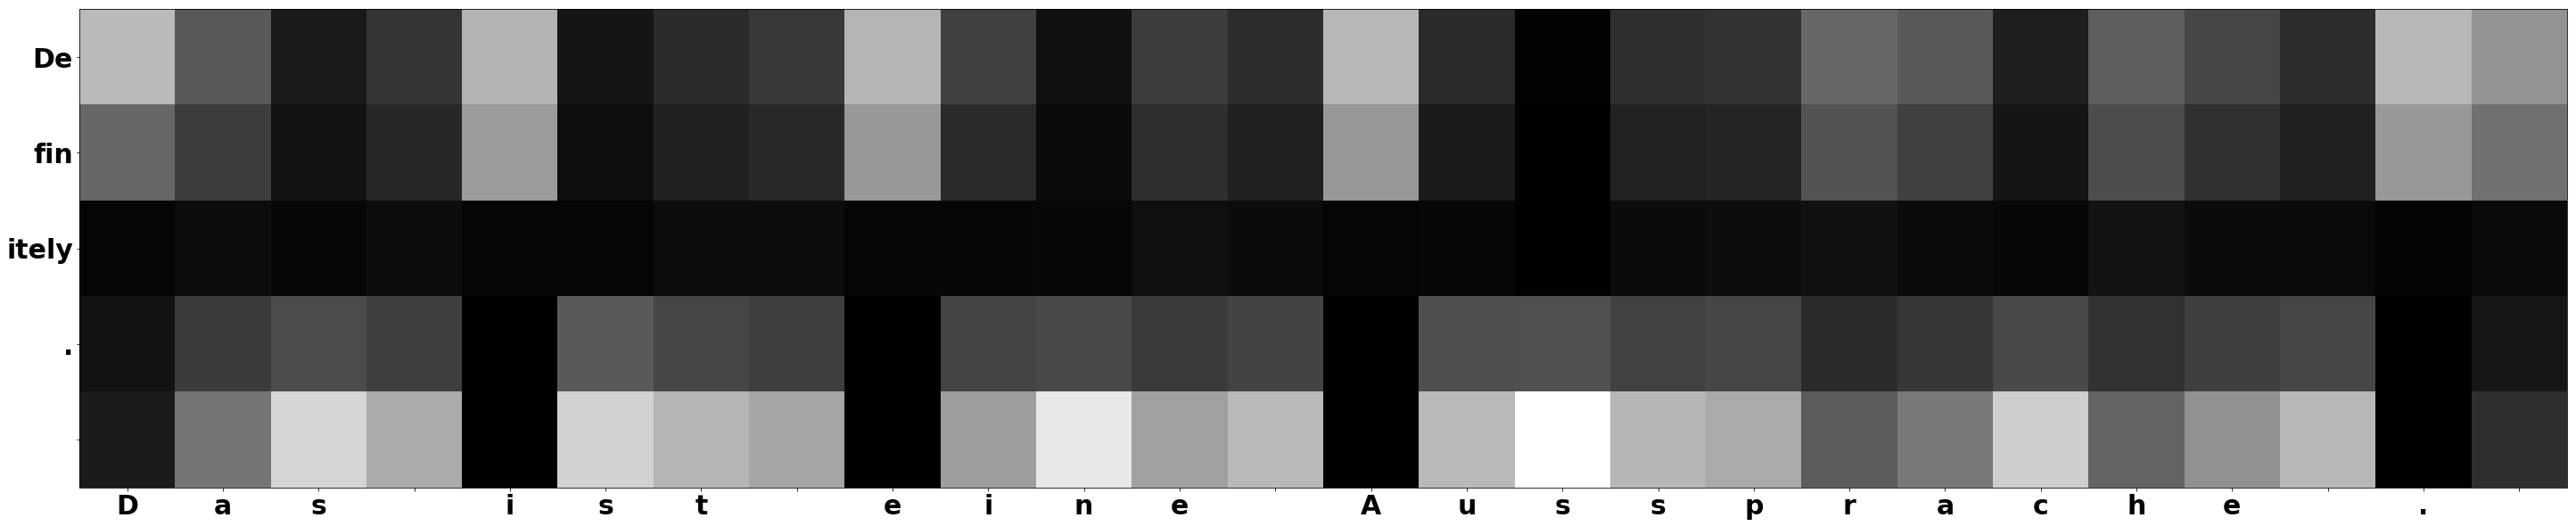

that was for: 2860
nb:  4
21
sample no 0
We totally accept it .
Die Aussprache ist .
20
Our shape: (21, 6)
nb of word:  5
()
6
0
Our number of t: 21
1
21
source: We totally accept it ., target: Die Aussprache ist .
saving in NIPS_final/deen_base_noln_len5/fig_3260.pdf


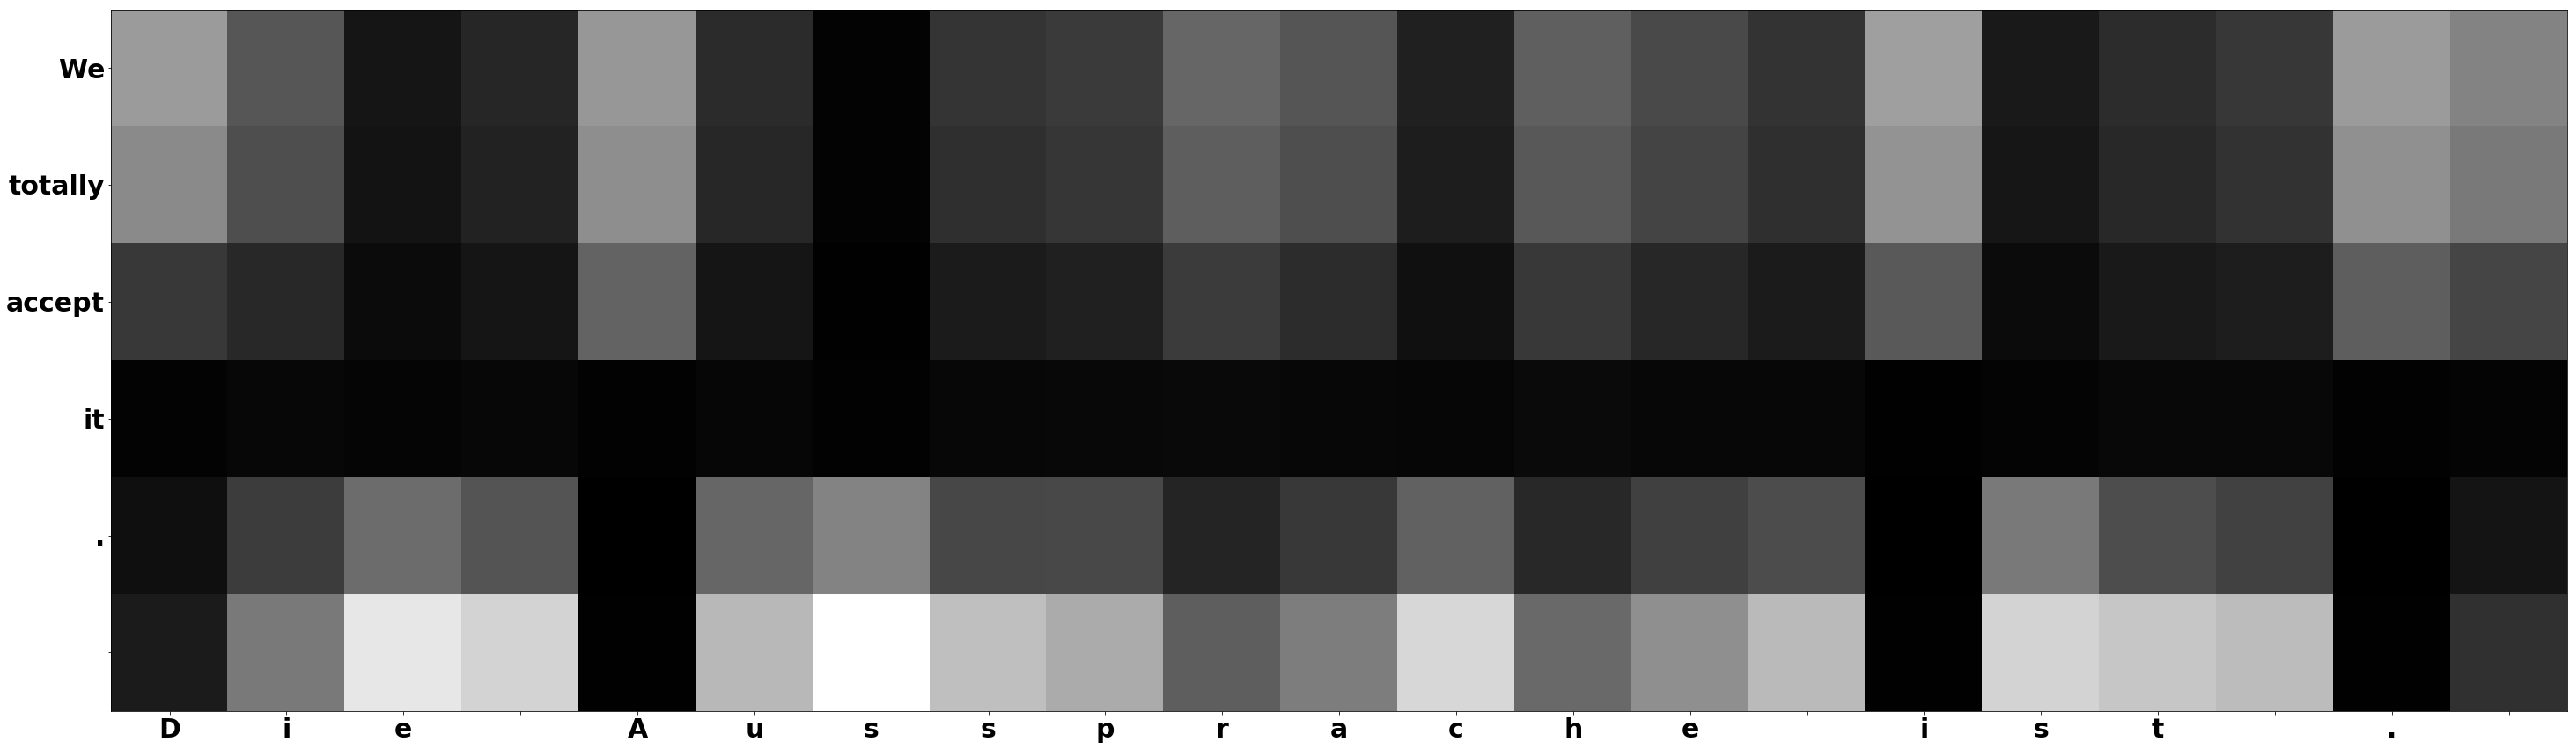

that was for: 3260
nb:  5
28
sample no 0
Travel along a vertical
Das ist der Stau Profakte .
27
Our shape: (28, 5)
nb of word:  4
()
5
0
Our number of t: 28
1
28
source: Travel along a vertical, target: Das ist der Stau Profakte .
saving in NIPS_final/deen_base_noln_len5/fig_5260.pdf


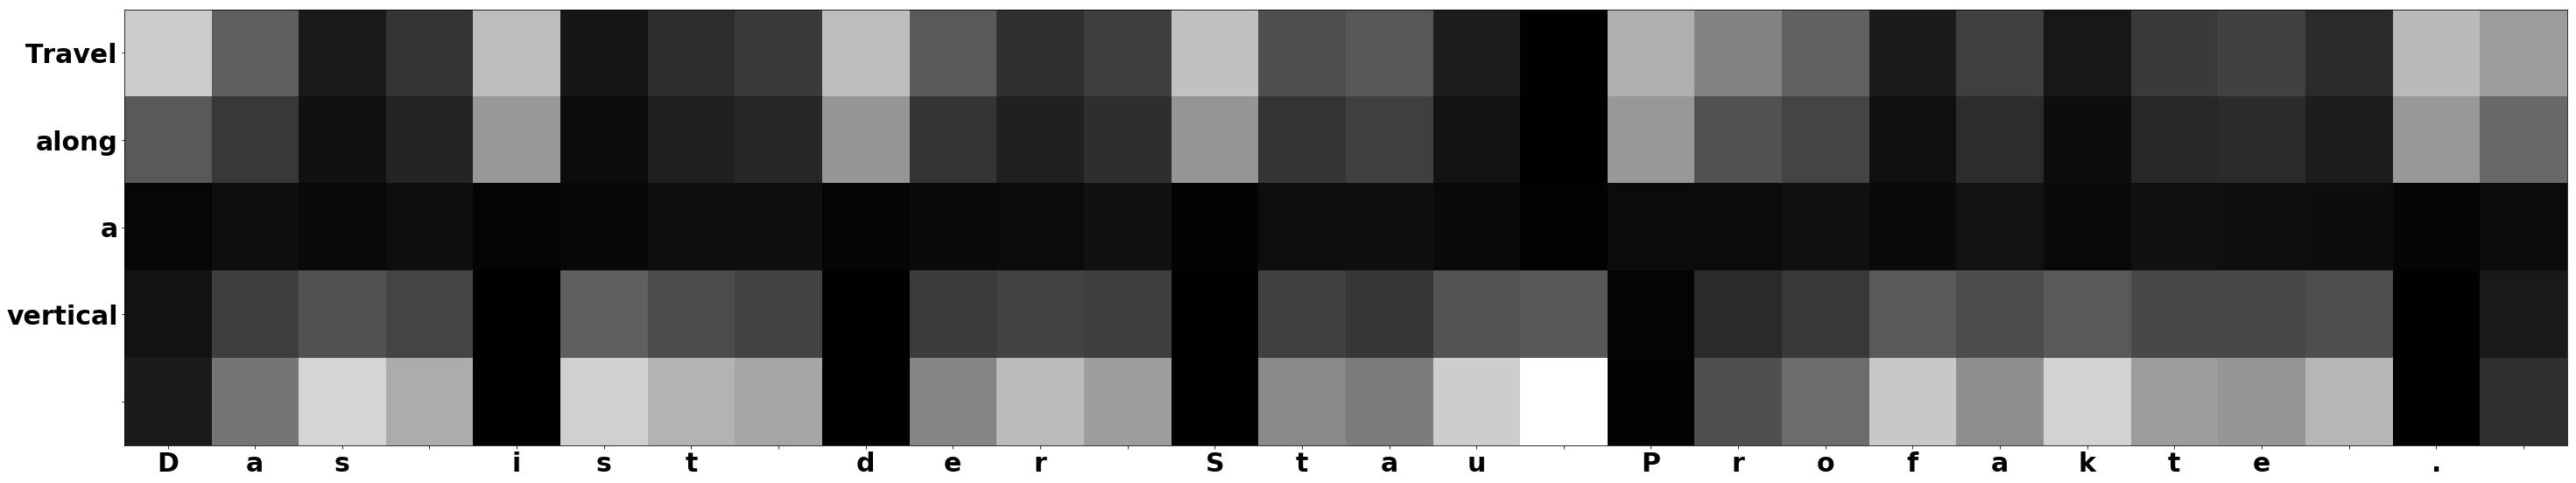

that was for: 5260
nb:  6
21
sample no 0
A note for the tourist
Die Aussprache ist .
20
Our shape: (21, 6)
nb of word:  5
()
6
0
Our number of t: 21
1
21
source: A note for the tourist, target: Die Aussprache ist .
saving in NIPS_final/deen_base_noln_len5/fig_5860.pdf


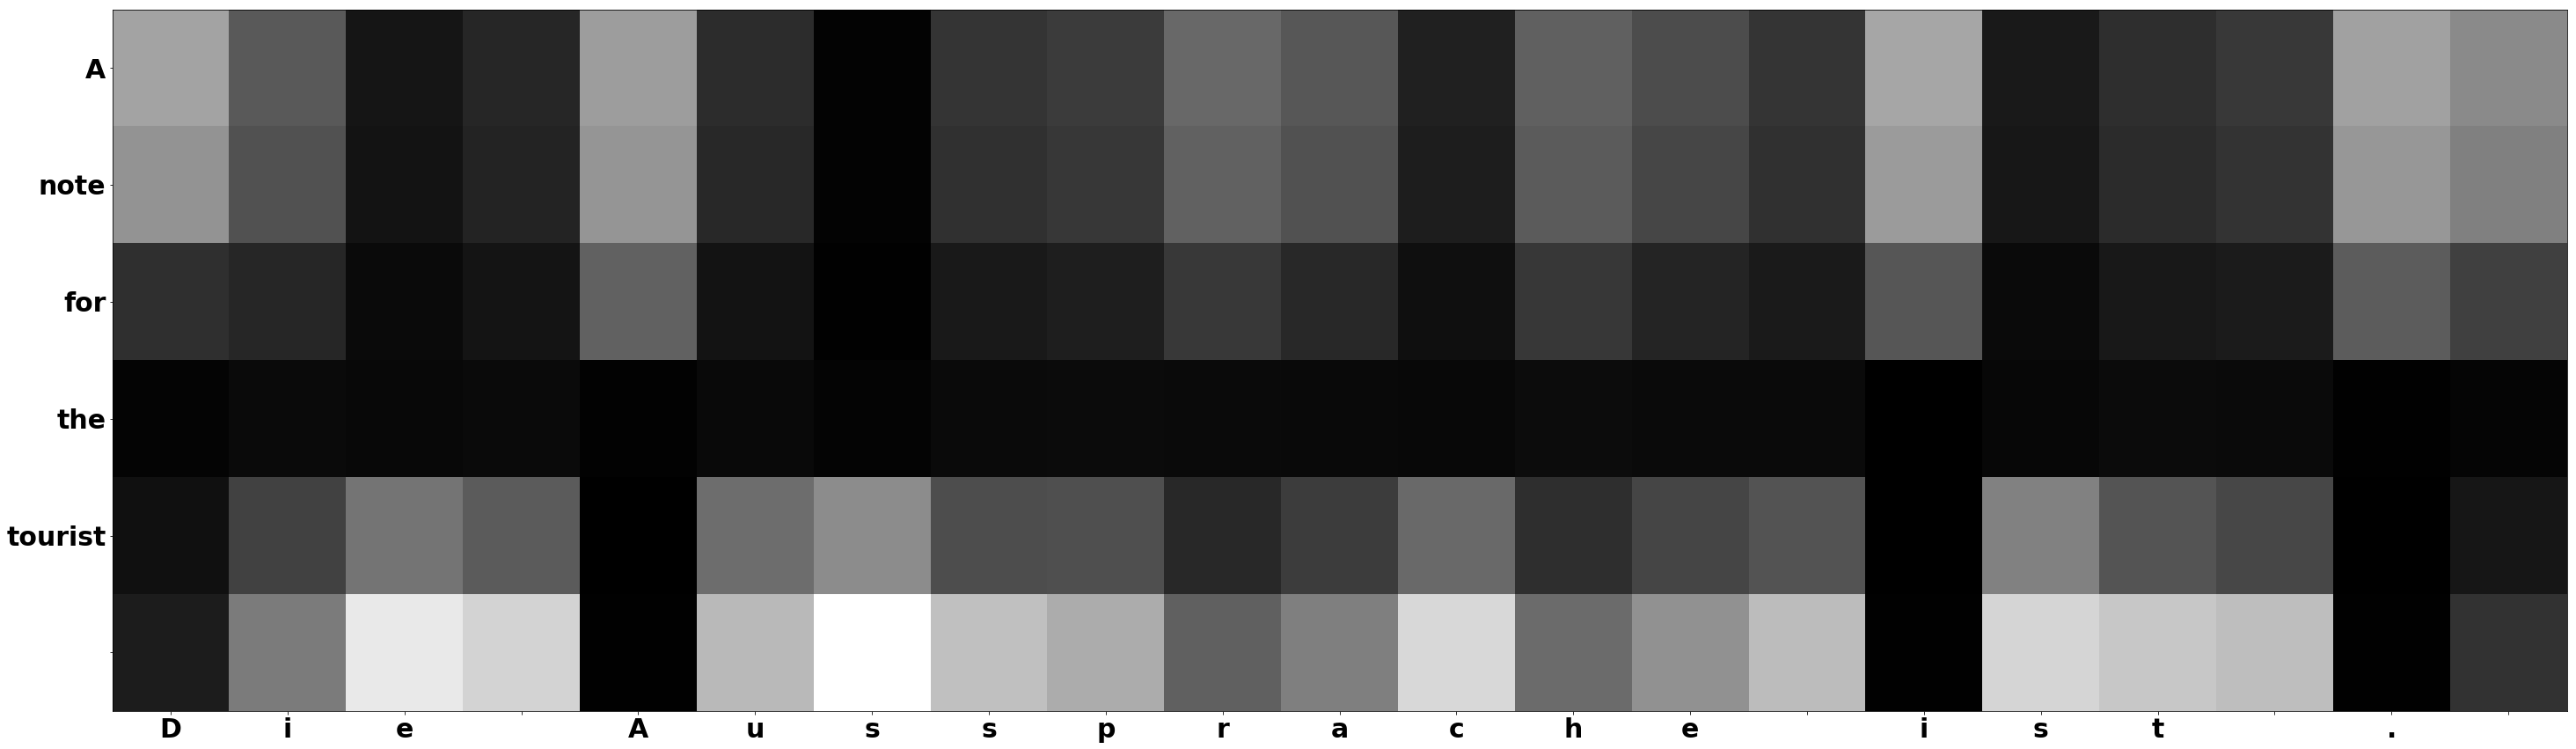

that was for: 5860
nb:  7
19
sample no 0
Store on a sofa
Das ist der Stau .
18
Our shape: (19, 5)
nb of word:  4
()
5
0
Our number of t: 19
1
19
source: Store on a sofa, target: Das ist der Stau .
saving in NIPS_final/deen_base_noln_len5/fig_7060.pdf


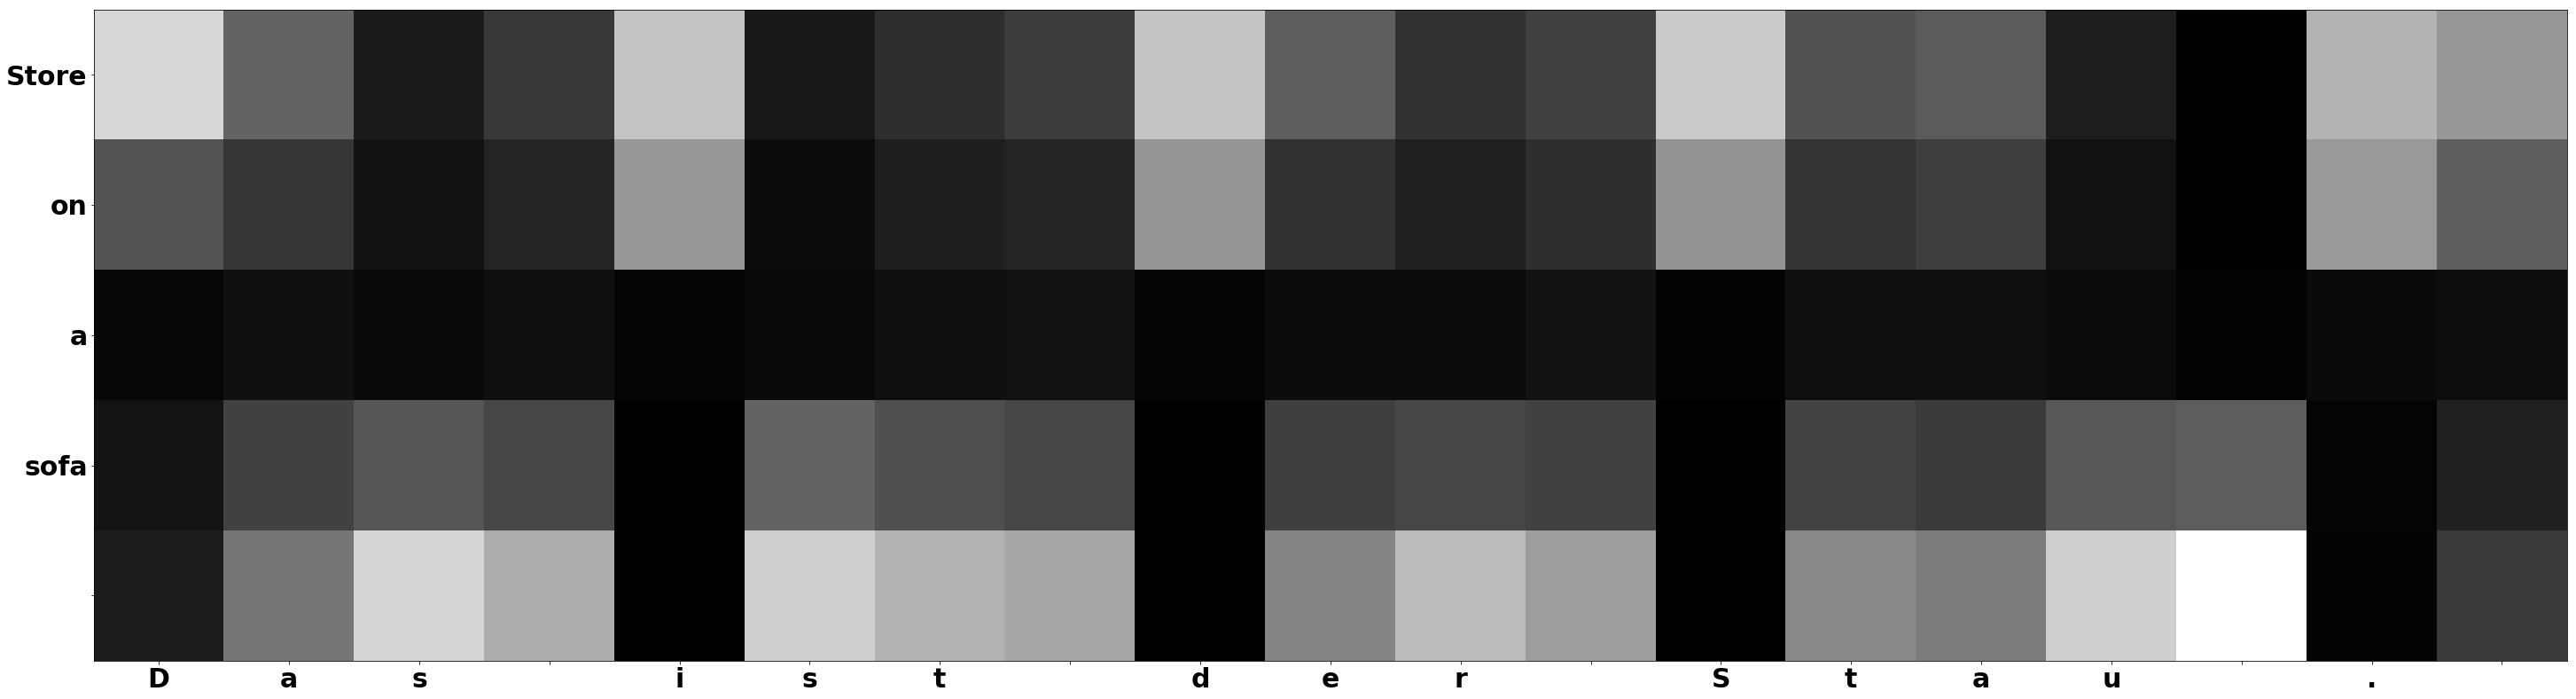

that was for: 7060
nb:  8
26
sample no 0
People accept orders .
Das ist eine Aussprache .
25
Our shape: (26, 5)
nb of word:  4
()
5
0
Our number of t: 26
1
26
source: People accept orders ., target: Das ist eine Aussprache .
saving in NIPS_final/deen_base_noln_len5/fig_7230.pdf


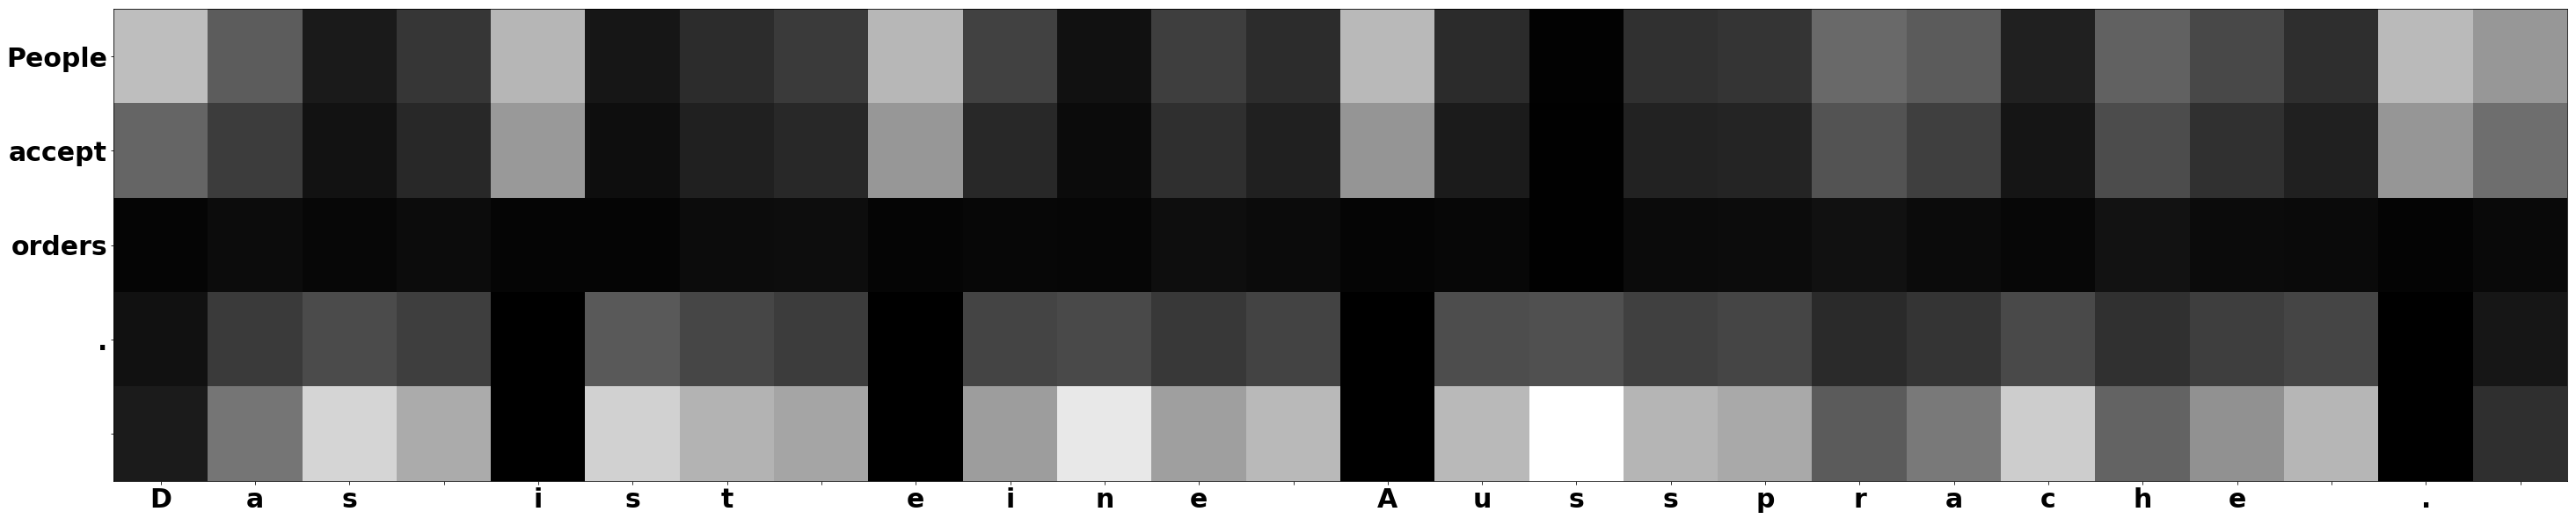

that was for: 7230
nb:  9
21
sample no 0
Can a minor buy ?
Die Aussprache ist .
20
Our shape: (21, 6)
nb of word:  5
()
6
0
Our number of t: 21
1
21
source: Can a minor buy ?, target: Die Aussprache ist .
saving in NIPS_final/deen_base_noln_len5/fig_7250.pdf


KeyboardInterrupt: 

In [135]:
for max_length, font_size in zip([6, 11, 16, 21, 26], [30, 30, 30, 20, 20]):

    fig_path = fig_path_pre
    fig_path += '_len'+str(max_length-1)

    if not os.path.exists(fig_path):
        os.makedirs(fig_path)

    fig_path = fig_path + '/fig_{}.pdf'
    print fig_path

    valid = data_iterator.TextIterator(source=data_path_source,
                                           target=data_path_target,
                                           source_dict=source_dic,
                                           target_dict=target_dic,
                                           n_words_source=24440,
                                           n_words_target=302,
                                           source_word_level=1,
                                           target_word_level=0,
                                           batch_size=1,
                                           sort_size=20)

    nb = 0
    for no, [x, y] in enumerate(valid):
        no += 7
        try:
            x, x_mask, y, y_mask, n_x = nmt.prepare_data(x, y, maxlen=max_length,
                                                         maxlen_trg=500,
                                                         n_words_src=24440,
                                                         n_words=302)

            if len(x[:, 0]) < max_length - 1:
                continue
            xs = [x[:, 0]]#[:, :, None]
            #print xs.shape
            #xs = xs.transpose((1, 0, 2))
            nb += 1
        except:
            #print "Oups!"
            continue

        translation, alphas, commits = visualisation_utils.translate(tparams, f_init, f_next, options, xs, module, k=1, normalize=False)
        print len(alphas[0])

        x_convert = visualisation_utils.convert([list(sentence) for sentence in x.T], dic_source, char_lvl=False)
        t_convert = visualisation_utils.convert(translation, dic_target, char_lvl=True)

        for i, [x_, y_, alpha, commit] in enumerate(zip(x_convert, t_convert, alphas, commits)):
            print "sample no", i
            print x_
            print y_
            #print y
            print len(y_)
            print "Our shape:", np.array(alpha).shape
            print "nb of word: ", len(x_.split())

            commit = np.array(commit)
            print commit.shape
            if len(commit.shape) == 0:
                commit = None
            else:
                commit = commit[:, 0]

            #print np.array(alpha).T


            show_alpha(np.array(alpha).T, x, np.array(translation), i , commits=None, no_name=no*10 + i, fig_path=fig_path, font_size=font_size)
            print "that was for:", no*10 + i
            print "nb: ", nb
            #if commits is not None:
            #    print "{}% commitment".format(float(np.array(commits[0])[:, 0].sum())/np.array(commits[0]).shape[0])

            break

        if nb> 10:
            break

In [28]:
import os
os.makedirs(fig_path)